# Functions

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [11]:
def df_processing(df):
    # correct_perfect: detect only 499
    df['correct_perfect'] = False
    df.loc[df['Change Points'] == "[499]", 'correct_perfect'] = True
    
    # correct partial: result include 499, it might include other change points.
    df['correct_partial'] = df["Change Points"].str.count("499")
    
    # the number of change points
    df['the number of detected change points'] = df["Change Points"].str.count(",") + 1
    
    # group name
    df["group"] = "rho: " + df["rho"].astype(str) + " , SNR: " + df["SNR"].astype(str) + " , n: " + df["n"].astype(str)
    
    return df

def accuracy_table(df, sort = False):
    n_sample = df.groupby("group").count()["Repitition"].unique()
    df_count = df[["rho", "SNR", "n", "correct_perfect", "correct_partial"]].groupby(["rho", "SNR", "n"]).sum().reset_index()
    df_count["accuracy_perfect"] = df_count["correct_perfect"]/n_sample
    df_count["accuracy_partial"] = df_count["correct_partial"]/n_sample
    
    if sort:
        df_count=df_count.sort_values("accuracy_partial", ascending=False)
    return df_count

# Our proposed methods

In [12]:
df = pd.read_csv('results/simulation_five_variate_20230321.csv')
df = df_processing(df)
df

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,6,386.690022,0.0,6.00,1000,0.000000,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,3,464.571500,0.0,6.00,1000,0.000000,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
2,5,465.427833,0.0,6.00,1000,0.153970,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
3,2,465.880617,0.0,6.00,1000,0.168152,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
4,7,465.965340,0.0,6.00,1000,0.154327,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
...,...,...,...,...,...,...,...,...,...,...,...
7495,497,440.471484,0.7,0.71,1000,0.431827,"[462, 471, 534, 714]",False,0,4,"rho: 0.7 , SNR: 0.71 , n: 1000"
7496,498,429.443668,0.3,0.71,1000,0.321422,"[527, 536]",False,0,2,"rho: 0.3 , SNR: 0.71 , n: 1000"
7497,499,429.414737,0.3,0.71,1000,0.328125,[499],True,1,1,"rho: 0.3 , SNR: 0.71 , n: 1000"
7498,498,424.631574,0.7,0.71,1000,0.393311,"[68, 479, 485, 495, 499]",False,1,5,"rho: 0.7 , SNR: 0.71 , n: 1000"


In [13]:
df_count = accuracy_table(df)
df_count

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,81,97,0.162,0.194
1,0.0,1.22,1000,121,143,0.242,0.286
2,0.0,2.07,1000,206,219,0.412,0.438
3,0.0,3.52,1000,261,265,0.522,0.530
4,0.0,6.00,1000,364,366,0.728,0.732
5,0.3,0.71,1000,51,91,0.102,0.182
6,0.3,1.22,1000,112,146,0.224,0.292
7,0.3,2.07,1000,164,195,0.328,0.390
8,0.3,3.52,1000,246,256,0.492,0.512
9,0.3,6.00,1000,334,337,0.668,0.674


# Our proposed methods-quadratic penalty

In [14]:
df_quad = pd.read_csv('results/simulation_five_variate_quadratic_penalty_20230429.csv')
df_quad = df_processing(df_quad)
df_quad

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,0,444.168769,0.0,6.00,1000,0.866193,[],False,0,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,0,448.369987,0.3,6.00,1000,0.549420,"[494, 506, 898]",False,0,3,"rho: 0.3 , SNR: 6.0 , n: 1000"
2,0,449.259993,0.7,6.00,1000,0.884346,[],False,0,1,"rho: 0.7 , SNR: 6.0 , n: 1000"
3,0,448.113686,0.0,3.52,1000,0.146673,[498],False,0,1,"rho: 0.0 , SNR: 3.52 , n: 1000"
4,0,448.359044,0.3,3.52,1000,0.826816,[],False,0,1,"rho: 0.3 , SNR: 3.52 , n: 1000"
...,...,...,...,...,...,...,...,...,...,...,...
7495,495,437.913422,0.7,0.71,1000,0.328537,"[499, 514]",False,1,2,"rho: 0.7 , SNR: 0.71 , n: 1000"
7496,497,437.632818,0.7,0.71,1000,0.291916,[499],True,1,1,"rho: 0.7 , SNR: 0.71 , n: 1000"
7497,498,435.656108,0.7,0.71,1000,0.331787,"[499, 822]",False,1,2,"rho: 0.7 , SNR: 0.71 , n: 1000"
7498,496,435.326580,0.7,0.71,1000,0.452836,"[386, 736]",False,0,2,"rho: 0.7 , SNR: 0.71 , n: 1000"


In [15]:
df_count_quad = accuracy_table(df_quad)
df_count_quad

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,30,57,0.060,0.114
1,0.0,1.22,1000,97,153,0.194,0.306
2,0.0,2.07,1000,231,259,0.462,0.518
3,0.0,3.52,1000,320,327,0.640,0.654
4,0.0,6.00,1000,372,373,0.744,0.746
5,0.3,0.71,1000,9,21,0.018,0.042
6,0.3,1.22,1000,25,48,0.050,0.096
7,0.3,2.07,1000,50,94,0.100,0.188
8,0.3,3.52,1000,131,184,0.262,0.368
9,0.3,6.00,1000,187,244,0.374,0.488


# Benchmarks: Bai and Perron

In [16]:
df_BP= pd.read_csv('results/simulation_five_variate_benchmark_BP_20230408.csv')

# correct_perfect: detect only 499
df_BP['correct_perfect'] = False
df_BP.loc[df_BP['Location of CP'] == "[500, 1000]", 'correct_perfect'] = True

# correct partial: result include 499, it might include other change points.
df_BP['correct_partial'] = df_BP["Location of CP"].str.count("500")

# group name
df_BP["group"] = "rho: " + df_BP["rho"].astype(str) + " , SNR: " + df_BP["SNR"].astype(str) + " , n: " + df_BP["n"].astype(str)
df_BP

,Repitition,Time,rho,SNR,n,The number of CP,Location of CP,correct_perfect,correct_partial,group
0,0,242.878282,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,6,243.477018,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
2,2,245.595690,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
3,3,245.595745,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
4,5,245.595867,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
...,...,...,...,...,...,...,...,...,...,...
7495,498,144.576718,0.3,0.71,1000,1,"[499, 1000]",False,0,"rho: 0.3 , SNR: 0.71 , n: 1000"
7496,499,143.618568,0.3,0.71,1000,1,"[501, 1000]",False,0,"rho: 0.3 , SNR: 0.71 , n: 1000"
7497,498,129.368120,0.7,0.71,1000,1,"[497, 1000]",False,0,"rho: 0.7 , SNR: 0.71 , n: 1000"
7498,497,131.325467,0.7,0.71,1000,1,"[506, 1000]",False,0,"rho: 0.7 , SNR: 0.71 , n: 1000"


## Accuracy

Findings:

- Higher SNR, higher accuracy
- HIgher rho, less accuracy relatively
- The estimated nnumber of CPD seems to be 1 for all sampling.

In [17]:
df_BP_count = df_BP[["rho", "SNR", "n", "correct_perfect", "correct_partial"]].groupby(["rho", "SNR", "n"]).sum().reset_index()
df_BP_count["accuracy_perfect"] = df_BP_count["correct_perfect"]/500
df_BP_count["accuracy_partial"] = df_BP_count["correct_partial"]/500
df_BP_count

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,196,196,0.392,0.392
1,0.0,1.22,1000,251,251,0.502,0.502
2,0.0,2.07,1000,303,303,0.606,0.606
3,0.0,3.52,1000,340,340,0.680,0.680
4,0.0,6.00,1000,374,374,0.748,0.748
5,0.3,0.71,1000,194,194,0.388,0.388
6,0.3,1.22,1000,239,239,0.478,0.478
7,0.3,2.07,1000,299,299,0.598,0.598
8,0.3,3.52,1000,331,331,0.662,0.662
9,0.3,6.00,1000,372,372,0.744,0.744


In [18]:
df_BP_count.sort_values("accuracy_partial", ascending=False)

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
4,0.0,6.00,1000,374,374,0.748,0.748
9,0.3,6.00,1000,372,372,0.744,0.744
14,0.7,6.00,1000,372,372,0.744,0.744
3,0.0,3.52,1000,340,340,0.680,0.680
8,0.3,3.52,1000,331,331,0.662,0.662
13,0.7,3.52,1000,329,329,0.658,0.658
2,0.0,2.07,1000,303,303,0.606,0.606
7,0.3,2.07,1000,299,299,0.598,0.598
12,0.7,2.07,1000,285,285,0.570,0.570
11,0.7,1.22,1000,262,262,0.524,0.524


## Estimated number of change points

Findings:

- All model detect 1 change point.

In [19]:
df_BP["The number of CP"].unique()

array([1])

## Optimality Gap: the distibution of the estimated location

Findings:

- Smaller SNR, wider range

In [20]:
df_BP['location'] = df_BP["Location of CP"].str[1:4].astype(int)
df_BP.head()

,Repitition,Time,rho,SNR,n,The number of CP,Location of CP,correct_perfect,correct_partial,group,location
0,0,242.878282,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000",500
1,6,243.477018,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000",500
2,2,245.595690,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000",500
3,3,245.595745,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000",500
4,5,245.595867,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0 , n: 1000",500


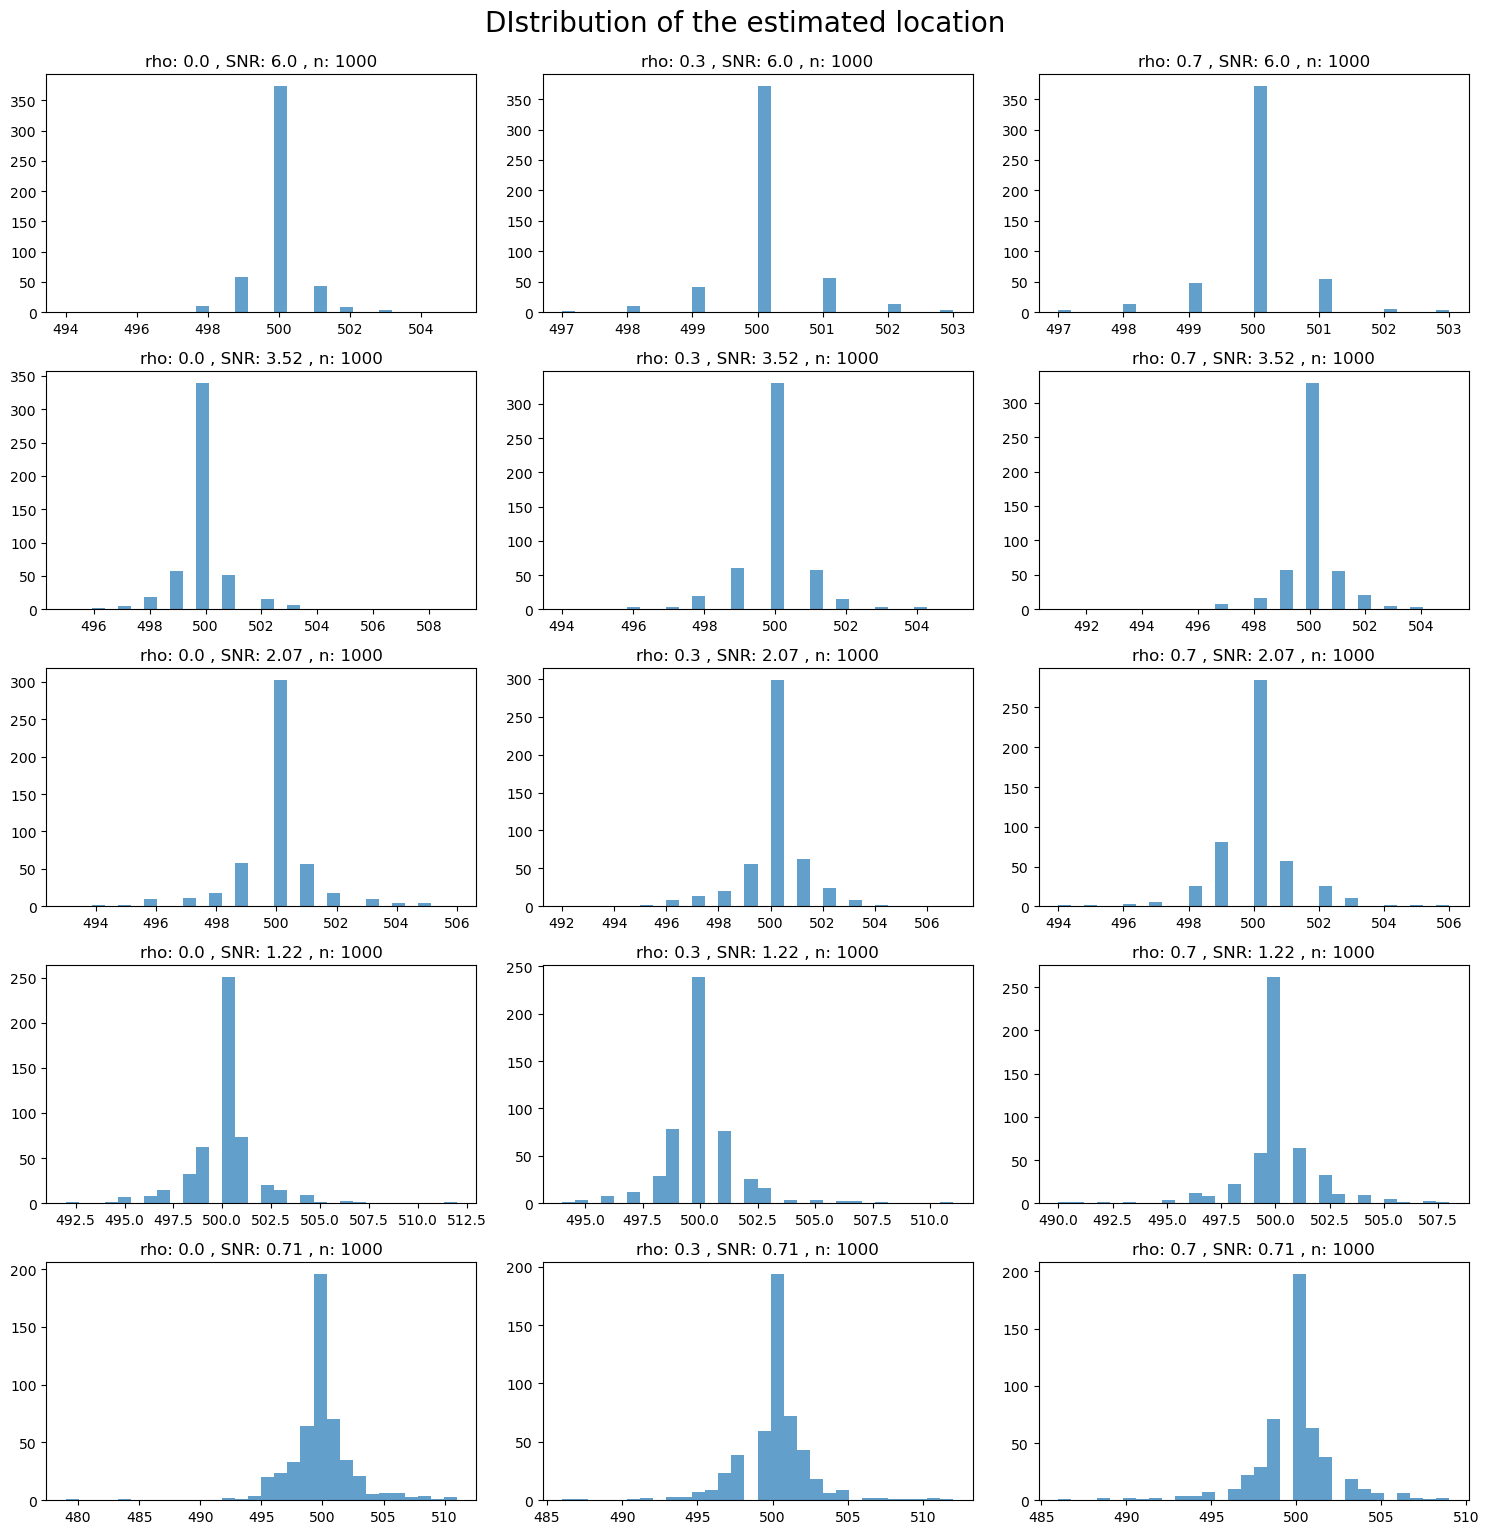

In [21]:
group_list = df_BP["group"].unique()

min_num = df_BP.location.min()
max_num = df_BP.location.max()

fig, ax = plt.subplots(5, 3, figsize=(15, 15))

for g, ax in zip(group_list, ax.ravel()):
    ax.hist(df_BP.loc[df_BP["group"] == g, "location"], alpha = 0.7, bins = 30)
    #ax.set_xticks(np.linspace(480, 520, 5))
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("DIstribution of the estimated location", fontsize=20).set_y(1.02)
plt.show()

# Benchmarks: Bayesian approach

In [47]:
df_bayes_1 = pd.read_csv('results/result_bayes_rho_03_SNR_122_20230416.csv')
df_bayes_2 = pd.read_csv('results/result_bayes_rho_03_SNR_071_20230501.csv')
df_bayes = pd.concat([df_bayes_1, df_bayes_2], ignore_index = True)
df_bayes["cps"] = df_bayes.cp1.astype(str) + "," + df_bayes.cp2.astype(str) + "," + df_bayes.cp3.astype(str) + "," + df_bayes.cp4.astype(str) + "," + df_bayes.cp5.astype(str) 
# correct change point is 501
# accuracy_partial : the change points with top5 highest posterior probability include 501
# accuracy_perfect: change point with the highest posterior probability is 501
df_bayes["accuracy_partial"] = df_bayes["cps"].str.count("501")
df_bayes["accuracy_perfect"] = df_bayes["cp1"].astype(str).str.count("501")
df_bayes_count = df_bayes.groupby(["rho", "SNR", "n"]).mean().reset_index()[["rho", "SNR", "n", "accuracy_partial", "accuracy_perfect"]]
df_bayes_count

,rho,SNR,n,accuracy_partial,accuracy_perfect
0,0.3,0.71,1000,0.204,0.036
1,0.3,1.22,1000,0.422,0.104


# Comparison

In [51]:
df_count["method"] = "Proposed"
df_count_quad["method"] = "Proposed with sq penalty"
df_BP_count["method"] = "Bai and Perron"
df_bayes_count["method"] = "Bayes"
df_plot = pd.concat([df_count, df_count_quad, df_BP_count, df_bayes_count], ignore_index = True)

df_plot["group"] = "rho: " + df_plot["rho"].astype(str) + " , SNR: " + df_plot["SNR"].astype(str) + " , n: " + df_plot["n"].astype(str)
df_plot

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial,method,group
0,0.0,0.71,1000,81.0,97.0,0.162,0.194,Proposed,"rho: 0.0 , SNR: 0.71 , n: 1000"
1,0.0,1.22,1000,121.0,143.0,0.242,0.286,Proposed,"rho: 0.0 , SNR: 1.22 , n: 1000"
2,0.0,2.07,1000,206.0,219.0,0.412,0.438,Proposed,"rho: 0.0 , SNR: 2.07 , n: 1000"
3,0.0,3.52,1000,261.0,265.0,0.522,0.530,Proposed,"rho: 0.0 , SNR: 3.52 , n: 1000"
4,0.0,6.00,1000,364.0,366.0,0.728,0.732,Proposed,"rho: 0.0 , SNR: 6.0 , n: 1000"
5,0.3,0.71,1000,51.0,91.0,0.102,0.182,Proposed,"rho: 0.3 , SNR: 0.71 , n: 1000"
6,0.3,1.22,1000,112.0,146.0,0.224,0.292,Proposed,"rho: 0.3 , SNR: 1.22 , n: 1000"
7,0.3,2.07,1000,164.0,195.0,0.328,0.390,Proposed,"rho: 0.3 , SNR: 2.07 , n: 1000"
8,0.3,3.52,1000,246.0,256.0,0.492,0.512,Proposed,"rho: 0.3 , SNR: 3.52 , n: 1000"
9,0.3,6.00,1000,334.0,337.0,0.668,0.674,Proposed,"rho: 0.3 , SNR: 6.0 , n: 1000"


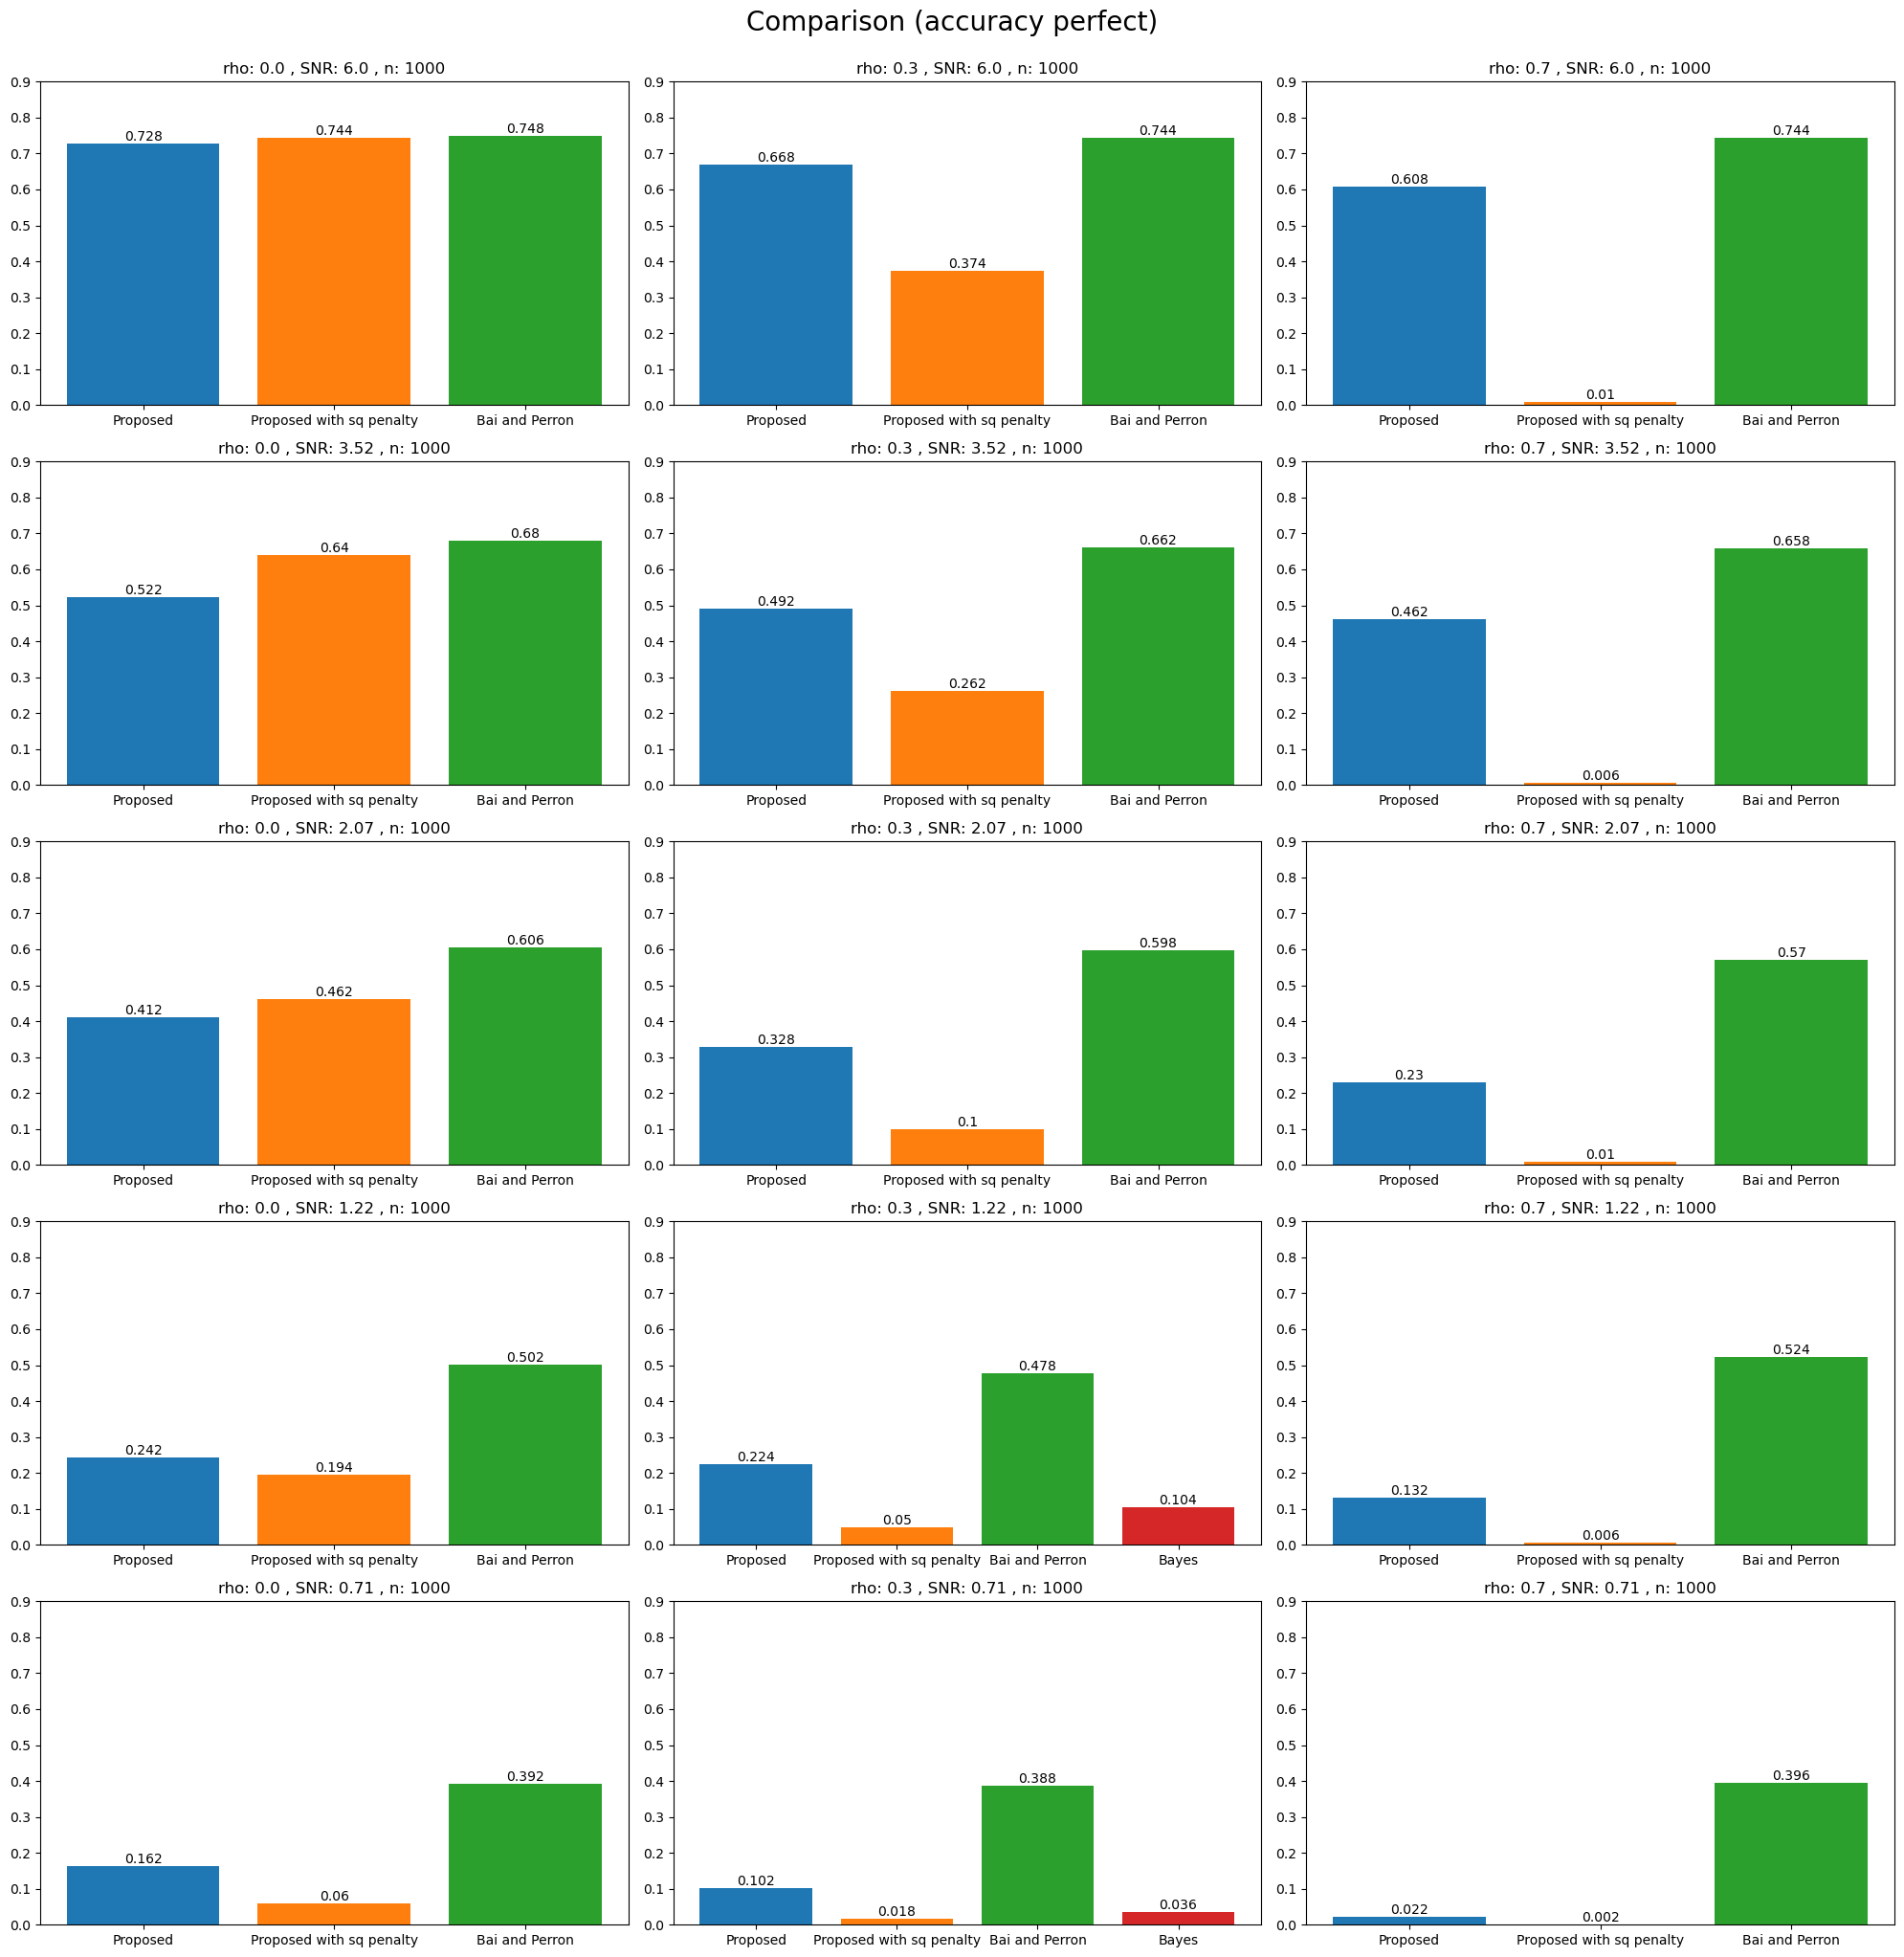

In [52]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))

for g, ax in zip(group_list, ax.ravel()):
    p = ax.bar(df_plot.loc[df_plot["group"] == g, "method"],
         df_plot.loc[df_plot["group"] == g, "accuracy_perfect"], color = ["tab:blue", "tab:orange", "tab:green", "tab:red"])
    ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    ax.bar_label(p, label_type = "edge")
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Comparison (accuracy perfect)", fontsize=20).set_y(1.02)
plt.show()

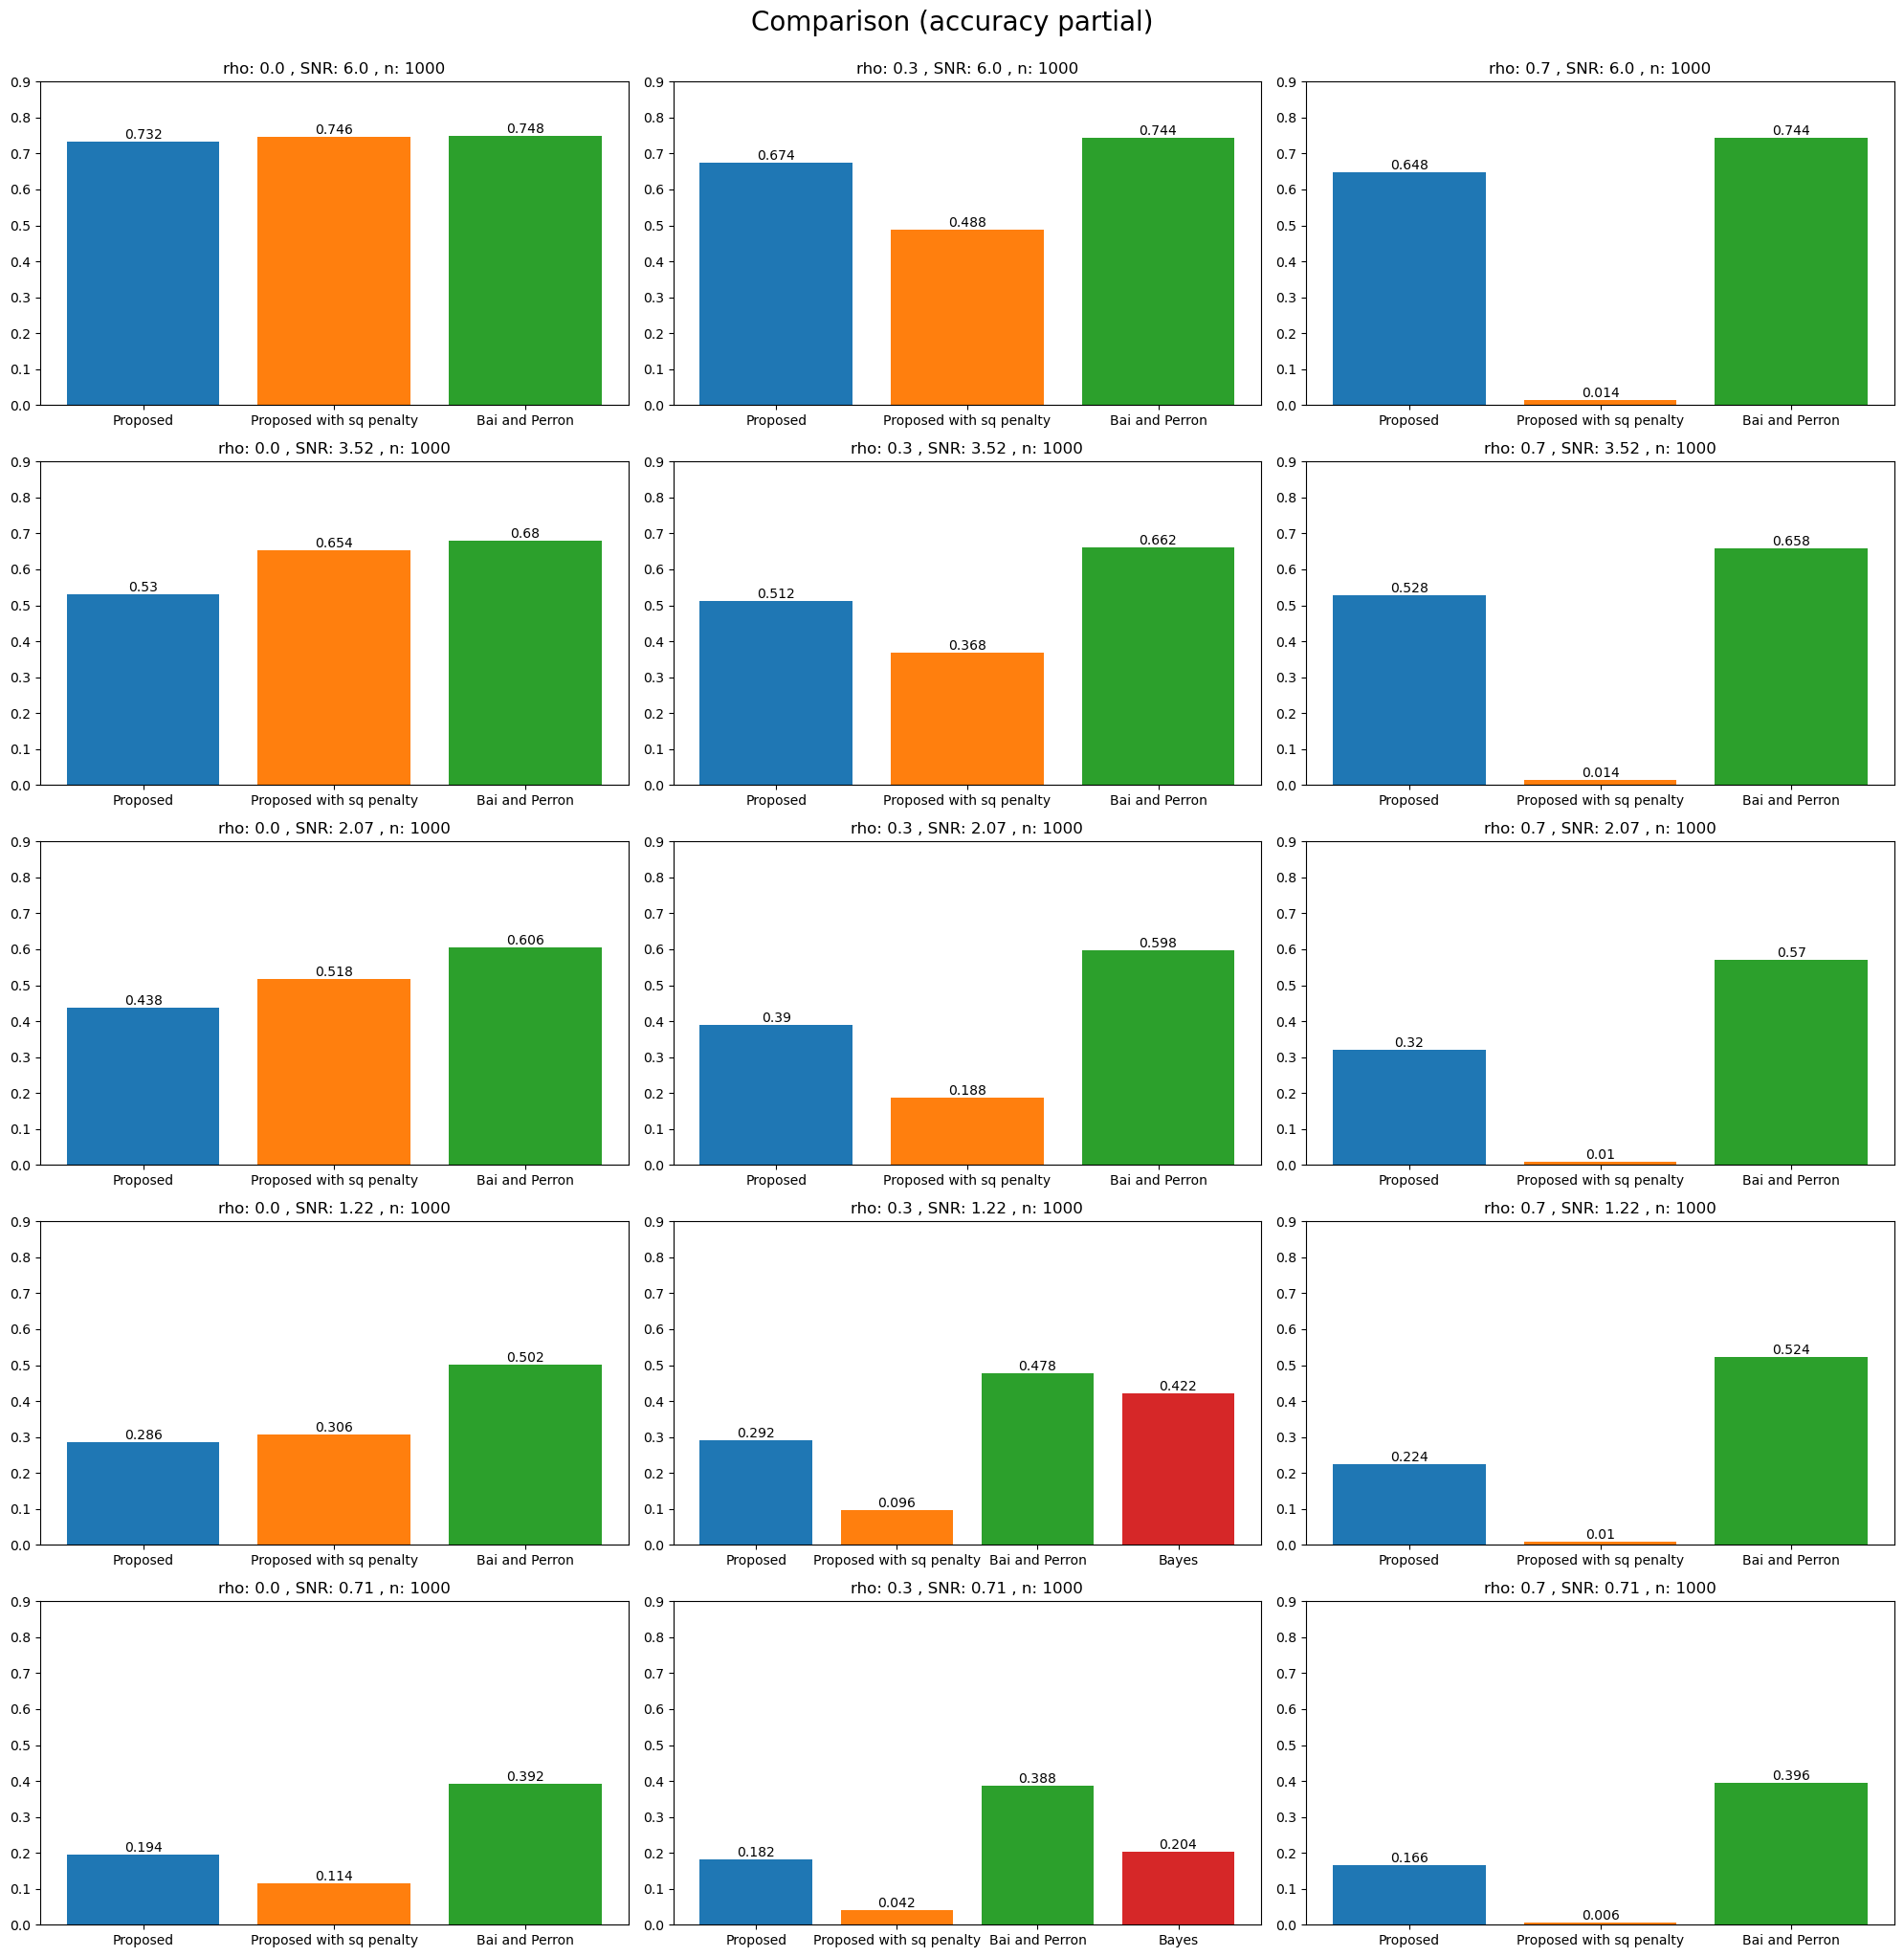

In [53]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))

for g, ax in zip(group_list, ax.ravel()):
    p = ax.bar(df_plot.loc[df_plot["group"] == g, "method"],
         df_plot.loc[df_plot["group"] == g, "accuracy_partial"], color = ["tab:blue", "tab:orange", "tab:green", "tab:red"])
    ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    ax.bar_label(p, label_type = "edge")
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Comparison (accuracy partial)", fontsize=20).set_y(1.02)
plt.show()